In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from nltk.corpus import sentiwordnet 
from nltk.corpus import wordnet 
import spacy


nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marcu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# EDA
### PREPROCESSING

In [4]:
lotr_data = pd.read_csv("lotr_scripts.csv")
lotr_data.head()

,Unnamed: 0,char,dialog,movie
0,0,DEAGOL,"Oh Smeagol Ive got one! , Ive got a fish Smeag...",The Return of the King
1,1,SMEAGOL,"Pull it in! Go on, go on, go on, pull it in!",The Return of the King
2,2,DEAGOL,Arrghh!,The Return of the King
3,3,SMEAGOL,Deagol!,The Return of the King
4,4,SMEAGOL,Deagol!,The Return of the King


In [5]:
lotr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390 entries, 0 to 2389
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2390 non-null   int64 
 1   char        2390 non-null   object
 2   dialog      2389 non-null   object
 3   movie       2390 non-null   object
dtypes: int64(1), object(3)
memory usage: 74.8+ KB


In [6]:
# Spotting inconcistencies with naming
lotr_data.char.unique()

array(['DEAGOL', 'SMEAGOL', '(GOLLUM', 'FRODO', 'MERRY', 'GIMLI',
       'GOLLUM', 'SAM', 'GANDALF', 'ARAGORN', 'PIPPIN', 'HOBBIT', 'ROSIE',
       'BILBO', 'TREEBEARD', 'SARUMAN', 'THEODEN', 'GALADRIL', 'ELROND',
       'GRIMA', 'FRODO VOICE OVER', 'WITCH KING', 'EOWYN', 'FARAMIR',
       'ORC', '\xa0GANDALF', 'SOLDIERS ON GATE', 'GOTHMOG', 'GENERAL',
       'CAPTAIN', 'SOLDIER', 'MOUTH OF SAURON', 'EOMER', 'ARMY', 'BOSON',
       'MERCENARY', 'EOWYN/MERRY', 'DENETHOR', 'ROHIRRIM',
       'GALADRIEL VOICEOVER', 'LEGOLAS', 'GALADRIEL', 'KING OF THE DEAD',
       'GRIMBOLD', 'IROLAS', 'ORCS', 'GAMLING', 'MADRIL', 'DAMROD',
       'SOLDIERS', 'SOLDIERS IN MINAS TIRITH', 'GANDALF VOICEOVER',
       'SOLDIER 1', 'SOLDIER 2', 'WOMAN', 'HALDIR', 'SAM VOICEOVER',
       'OLD MAN', 'BOROMIR', 'CROWD', 'ARWEN', 'ELROND VOICEOVER',
       'ARWEN VOICEOVER', 'ARAGORN ', 'HAMA', 'SHARKU', 'PEOPLE', 'LADY',
       'FREDA', 'MORWEN', 'EYE OF SAURON', 'ROHAN STABLEMAN', 'GORBAG',
       'ARGORN', 'GA

In [7]:
flaws = list(["(GOLLUM", "GALADRIL", "FRODO VOICE OVER", "\xa0GANDALF", "MOUTH OF SAURON", "GALADRIEL VOICEOVER", "GANDALF VOICEOVER", 
         "SAM VOICEOVER", "ELROND VOICEOVER", "ARWEN VOICEOVER", "ARAGORN ", "ARGORN", "GANDALF VOICE OVER", "SARUMAN VOICE OVER", 
         "SARUMAN VOICE OVER ", "URUK-HAI" "FRODO ", "GALADRIEL VOICE-OVER", "SAURON VOICE", "SAM ", "FRODO VOICE", 
         "GALADRIEL VOICE OVER", "SARUMAN VOICEOVER", "BILBO VOICEOVER", "GATEKEEPR", "GAN DALF"])

correct = list(["GOLLUM", "GALADRIEL", "FRODO", "GANDALF","SAURON", "GALADRIEL", "GANDALF", "SAM", "ELROND", "ARWEN", "ARAGORN", "ARAGORN", 
                "GANDALF", "SARUMAN", "SARUMAN", "URUK HAI", "FRODO", "GALADRIEL", "SAURON", "SAM", "FRODO", "GALADRIEL", "SARUMAN", 
                "BILBO", "GATEKEEPER", "GANDALF"])

for i in range(len(flaws)):
    lotr_data.loc[lotr_data["char"] == flaws[i], "char"] = correct[i]
lotr_data.char.unique()


array(['DEAGOL', 'SMEAGOL', 'GOLLUM', 'FRODO', 'MERRY', 'GIMLI', 'SAM',
       'GANDALF', 'ARAGORN', 'PIPPIN', 'HOBBIT', 'ROSIE', 'BILBO',
       'TREEBEARD', 'SARUMAN', 'THEODEN', 'GALADRIEL', 'ELROND', 'GRIMA',
       'WITCH KING', 'EOWYN', 'FARAMIR', 'ORC', 'SOLDIERS ON GATE',
       'GOTHMOG', 'GENERAL', 'CAPTAIN', 'SOLDIER', 'SAURON', 'EOMER',
       'ARMY', 'BOSON', 'MERCENARY', 'EOWYN/MERRY', 'DENETHOR',
       'ROHIRRIM', 'LEGOLAS', 'KING OF THE DEAD', 'GRIMBOLD', 'IROLAS',
       'ORCS', 'GAMLING', 'MADRIL', 'DAMROD', 'SOLDIERS',
       'SOLDIERS IN MINAS TIRITH', 'SOLDIER 1', 'SOLDIER 2', 'WOMAN',
       'HALDIR', 'OLD MAN', 'BOROMIR', 'CROWD', 'ARWEN', 'HAMA', 'SHARKU',
       'PEOPLE', 'LADY', 'FREDA', 'MORWEN', 'EYE OF SAURON',
       'ROHAN STABLEMAN', 'GORBAG', 'BOROMIR ', 'UGLUK', 'SHAGRAT',
       'FRODO ', 'URUK-HAI', 'SNAGA', 'GRISHNAKH', 'MERRY and PIPPIN',
       'WILDMAN', 'STRIDER', 'EOTHAIN', 'ROHAN HORSEMAN', 'FARMER MAGGOT',
       'WHITE WIZARD', 'MERRY AND P

In [8]:
lotr_data['dialog'] = lotr_data['dialog'].fillna('')
lotr_data = lotr_data.drop(["Unnamed: 0", "movie"], axis=1)
lotr_data.head()

,char,dialog
0,DEAGOL,"Oh Smeagol Ive got one! , Ive got a fish Smeag..."
1,SMEAGOL,"Pull it in! Go on, go on, go on, pull it in!"
2,DEAGOL,Arrghh!
3,SMEAGOL,Deagol!
4,SMEAGOL,Deagol!


### Initial EDA

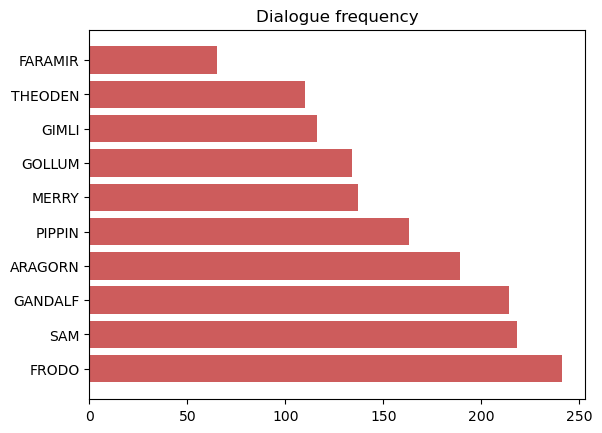

In [9]:
# Plotting dialouge frequnecy
char_freq = lotr_data.groupby("char").size().reset_index(name="freq")
char_freq = char_freq.sort_values(by="freq",ascending=False)
plt.barh(char_freq.char[:10], char_freq.freq[:10], color="indianred")
plt.title("Dialogue frequency")
plt.show()


### SIMPLE FEATURE ENGENERING

In [10]:
# Adding simple but perhaps effective features
lotr_data["word_len"] = lotr_data.dialog.apply(lambda x: len(x.split()))
lotr_data["character_len"] = lotr_data.dialog.apply(lambda x: len(x))

# Stopword counter
stopwords_set = set(stopwords.words("english"))
lotr_data["stopword_count"] = lotr_data.dialog.apply(lambda x: sum(1 for word in x.split() if word.lower() in stopwords_set))

# frequency of word classes
nlp = spacy.load("en_core_web_sm")

def count_verbs(text):
    doc = nlp(text)
    return sum(1 for token in doc if token.pos_ == "VERB")

def count_adjectives(text):
    doc = nlp(text)
    return sum(1 for token in doc if token.pos_ == "ADJ")

def count_proper_noun(text):
    doc = nlp(text)
    return sum(1 for token in doc if token.pos_ == "PROPN")

lotr_data['verb_count'] = lotr_data['dialog'].apply(count_verbs)
lotr_data['adj_count'] = lotr_data['dialog'].apply(count_adjectives)
lotr_data['propn_count'] = lotr_data['dialog'].apply(count_proper_noun)

lotr_data.head()

,char,dialog,word_len,character_len,stopword_count,verb_count,adj_count,propn_count
0,DEAGOL,"Oh Smeagol Ive got one! , Ive got a fish Smeag...",12,62,1,2,0,3
1,SMEAGOL,"Pull it in! Go on, go on, go on, pull it in!",12,46,2,5,0,0
2,DEAGOL,Arrghh!,1,8,0,1,0,0
3,SMEAGOL,Deagol!,1,9,0,0,0,0
4,SMEAGOL,Deagol!,1,9,0,0,0,0


C:\Users\marcu\AppData\Local\Temp\ipykernel_31312\4054842772.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


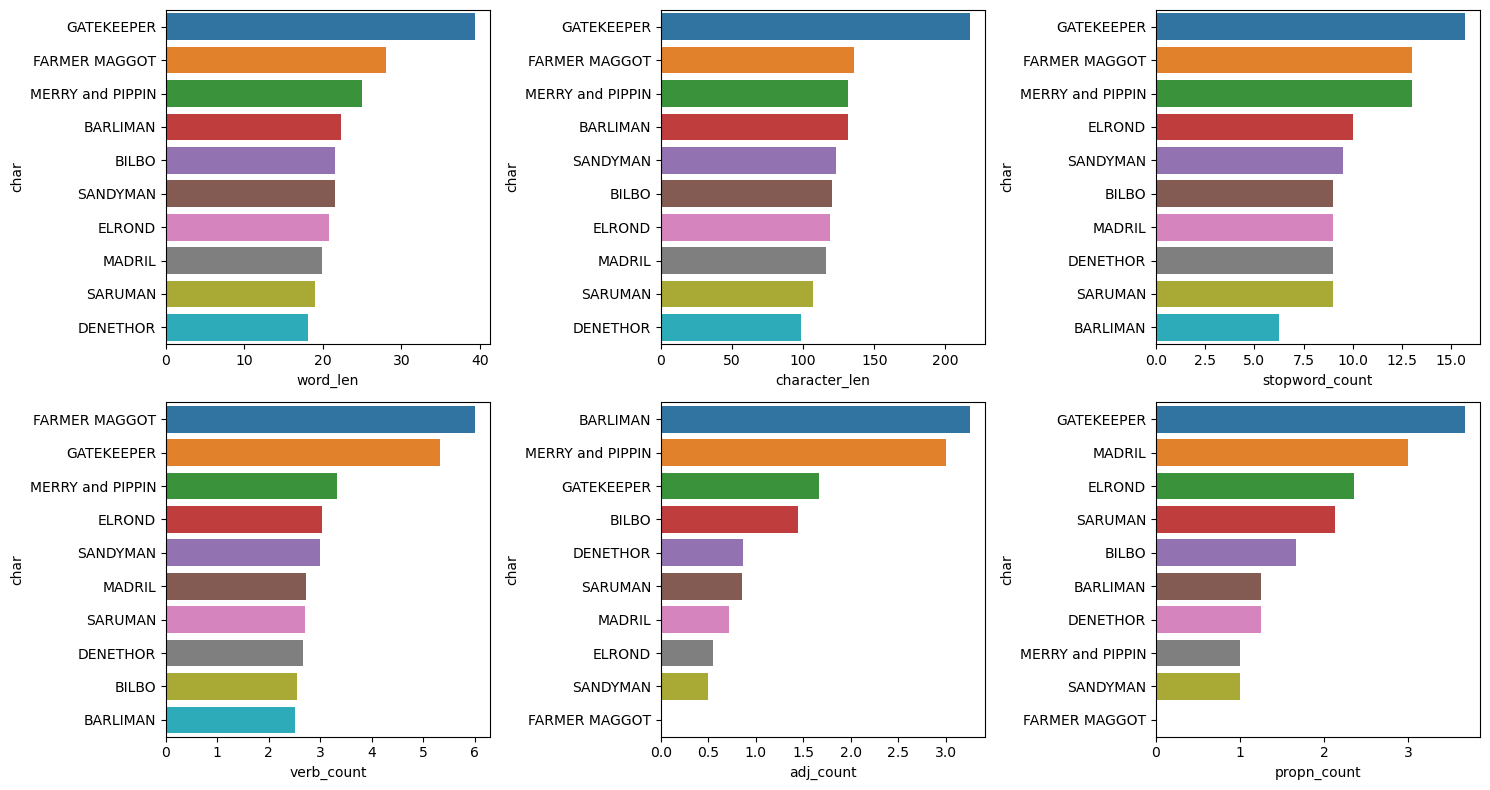

In [11]:
# Plotting dialouge frequnecy
char_var = lotr_data.groupby("char")[["word_len", "character_len", "stopword_count", "verb_count", "adj_count", "propn_count"]].mean().reset_index()
#char_var = char_var.sort_values(by="freq",ascending=False)

plt.figure(figsize = (15, 8))
plt.tight_layout()
plt.subplot(2, 3, 1)
char_var = char_var.sort_values(by="word_len", ascending=False)[:10]
sns.barplot(x=char_var.word_len, y=char_var.char)
plt.subplot(2, 3, 2)
char_var = char_var.sort_values(by="character_len", ascending=False)[:10]
sns.barplot(x=char_var.character_len, y=char_var.char)
plt.subplot(2, 3, 3)
char_var = char_var.sort_values(by="stopword_count", ascending=False)[:10]
sns.barplot(x=char_var.stopword_count, y=char_var.char)
plt.subplot(2, 3, 4)
char_var = char_var.sort_values(by="verb_count", ascending=False)[:10]
sns.barplot(x=char_var.verb_count, y=char_var.char)
plt.subplot(2, 3, 5)
char_var = char_var.sort_values(by="adj_count", ascending=False)[:10]
sns.barplot(x=char_var.adj_count, y=char_var.char)
plt.subplot(2, 3, 6)
char_var = char_var.sort_values(by="propn_count", ascending=False)[:10]
sns.barplot(x=char_var.propn_count, y=char_var.char)
plt.tight_layout()
plt.show()


### SENTIMENT ANALYSIS

In [12]:
# Dialog sentiment

def word_sentiment_score(word: str) -> float:
    synsets = list(sentiwordnet.senti_synsets(word))
    if synsets:
        sentiment = synsets[0]
        return sentiment.pos_score() - sentiment.neg_score()
    else:
        return 0.0  

def sentence_sentiment(sentence):
    sent = nlp(sentence)
    sent_sentiment = sum(word_sentiment_score(token.text) for token in sent)
    return sent_sentiment

lotr_data["dialog_sentiment"] = lotr_data['dialog'].apply(sentence_sentiment)
lotr_data

,char,dialog,word_len,character_len,stopword_count,verb_count,adj_count,propn_count,dialog_sentiment
0,DEAGOL,"Oh Smeagol Ive got one! , Ive got a fish Smeag...",12,62,1,2,0,3,0.250
1,SMEAGOL,"Pull it in! Go on, go on, go on, pull it in!",12,46,2,5,0,0,0.000
2,DEAGOL,Arrghh!,1,8,0,1,0,0,0.000
3,SMEAGOL,Deagol!,1,9,0,0,0,0,0.000
4,SMEAGOL,Deagol!,1,9,0,0,0,0,0.000
...,...,...,...,...,...,...,...,...,...
2385,PIPPIN,Merry!,1,7,0,0,0,1,0.625
2386,ARAGORN,Merry!,1,7,0,0,0,1,0.625
2387,MERRY,He's always followed me everywhere I went sinc...,40,211,19,5,1,2,0.000
2388,ARAGORN,One thing I've learnt about Hobbits: They are ...,12,65,5,1,1,1,0.000


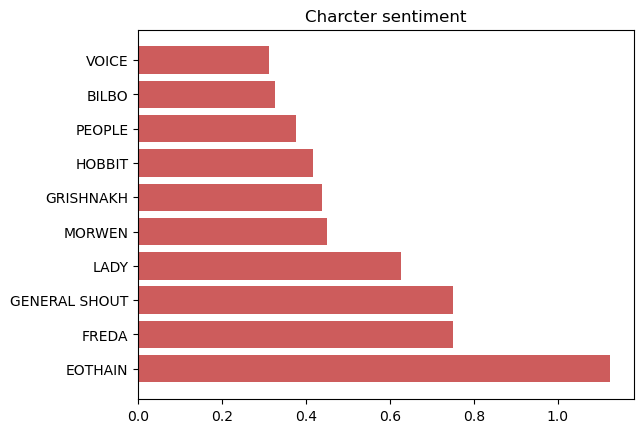

In [13]:
# Plotting dialouge frequnecy
char_sent = lotr_data.groupby("char")["dialog_sentiment"].mean().reset_index()
char_sent = char_sent.sort_values(by="dialog_sentiment", ascending=False)
plt.barh(char_sent.char[:10], char_sent.dialog_sentiment[:10], color="indianred")
plt.title("Charcter sentiment")
plt.show()

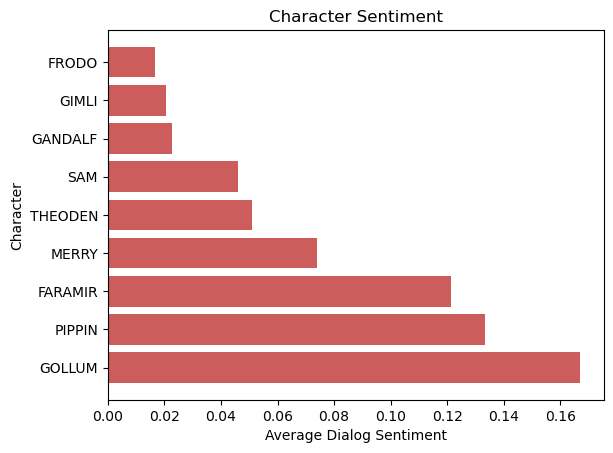

In [14]:
imp_char = ["FRODO", "SAM", "GANDALF", "PIPPIN", "MERRY", "GOLLUM", "GIMLI", "THEODEN", "FARAMIR"]
# Plotting dialouge frequnecy
char_sent = lotr_data.groupby("char")["dialog_sentiment"].mean().reset_index()
char_sent = char_sent.sort_values(by="dialog_sentiment", ascending=False)
char_sent_filtered = char_sent[char_sent['char'].isin(imp_char)]
plt.barh(char_sent_filtered['char'], char_sent_filtered['dialog_sentiment'], color="indianred")
plt.title("Character Sentiment")
plt.xlabel("Average Dialog Sentiment")
plt.ylabel("Character")
plt.show()

### LDA - Topic Analysis

In [15]:
# Topic modelling using LDA
from typing import List
import gensim
from gensim.utils import simple_preprocess
from nltk.stem import SnowballStemmer
import re, logging, warnings, pyLDAvis
from pprint import pprint
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis.gensim  # don't skip this
%matplotlib inline

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
warnings.filterwarnings("ignore",category=DeprecationWarning)

stemmer = SnowballStemmer("english")


def stem(text):
    return stemmer.stem(text)

def preprocess_for_topic(document: str) -> List[str]:

    #tokenized = nlp(document)

    preprocessed = []
    for token in gensim.utils.simple_preprocess(document, min_len=4):
        if token not in stopwords_set: #and len(token) > 3:
            preprocessed.append(stem(token))
    return preprocessed


preprocessed = []
for dialog in lotr_data.dialog:
    preprocessed.append(preprocess_for_topic(dialog))
dic=corpora.Dictionary(preprocessed)
bow_corpus = [dic.doc2bow(doc) for doc in preprocessed]


lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics = 3, id2word = dic, passes = 10, workers = 2, random_state=42)
lda_model.show_topics()

[(0,
  '0.024*"come" + 0.014*"back" + 0.011*"must" + 0.010*"time" + 0.008*"hold" + 0.008*"go" + 0.007*"like" + 0.007*"leav" + 0.006*"never" + 0.006*"look"'),
 (1,
  '0.013*"hobbit" + 0.013*"merri" + 0.009*"pippin" + 0.008*"good" + 0.008*"precious" + 0.008*"shire" + 0.006*"sorri" + 0.006*"think" + 0.006*"alway" + 0.006*"must"'),
 (2,
  '0.024*"frodo" + 0.013*"gandalf" + 0.012*"know" + 0.010*"ring" + 0.010*"lord" + 0.010*"smeagol" + 0.009*"come" + 0.008*"would" + 0.008*"friend" + 0.008*"gondor"')]

In [16]:
# Extract top contributing words for each topic
top_words_per_topic = []
for topic_id in range(lda_model.num_topics):
    topic_words = lda_model.show_topic(topic_id, topn=5)
    top_words = [word for word, _ in topic_words]
    top_words_per_topic.append(top_words)


for i, words in enumerate(top_words_per_topic):
    print(f"Topic {i}: {', '.join(words)}")

Topic 0: come, back, must, time, hold
Topic 1: hobbit, merri, pippin, good, precious
Topic 2: frodo, gandalf, know, ring, lord


In [17]:
# Classifying the dialogs to their respective topics
predictions = lda_model[bow_corpus]
topic_list = []

for i, pred in enumerate(predictions[:5]):
    max_prob_topic = max(pred, key=lambda x: x[1])
    topic_list.append(max_prob_topic)
    topic_num, prob = max_prob_topic
    topic_keywords = ", ".join([word for word, _ in lda_model.show_topic(topic_num)])
    print(f"Review {i}:")
    print(f"Review body: {lotr_data.dialog[i]}")
    print(f"Predicted Topic: {topic_num}, Confidence: {prob:.4f}")

Review 0:
Review body: Oh Smeagol Ive got one! , Ive got a fish Smeagol, Smeagol!    
Predicted Topic: 2, Confidence: 0.8665
Review 1:
Review body: Pull it in! Go on, go on, go on, pull it in!  
Predicted Topic: 0, Confidence: 0.7770
Review 2:
Review body: Arrghh! 
Predicted Topic: 1, Confidence: 0.6647
Review 3:
Review body: Deagol!  
Predicted Topic: 0, Confidence: 0.6654
Review 4:
Review body: Deagol!  
Predicted Topic: 0, Confidence: 0.6654


In [18]:
# supporting function
def compute_coherence_values(corpus, dictionary, k):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=42,
                                           chunksize=100,
                                           passes=10,)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=preprocessed, dictionary=dic, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [19]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 3
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Validation sets
num_of_docs = len(bow_corpus)
corpus_sets = [gensim.utils.ClippedCorpus(bow_corpus, int(num_of_docs*0.75)), 
               bow_corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # get the coherence score for the given parameters
            cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dic, 
                                                  k=k)
            # Save the model results
            model_results['Validation_Set'].append(corpus_title[i])
            model_results['Topics'].append(k)
            model_results['Coherence'].append(cv)
                    
            pbar.update(1)
    pd.DataFrame(model_results)
    pbar.close()

100%|██████████| 16/16 [10:03<00:00, 37.72s/it]


In [25]:
# Her må du plotte et diagram elns
model_res = pd.DataFrame(model_results)
model_res

,Validation_Set,Topics,Coherence
0,75% Corpus,3,0.345964
1,75% Corpus,4,0.417794
2,75% Corpus,5,0.402216
3,75% Corpus,6,0.433594
4,75% Corpus,7,0.397001
5,75% Corpus,8,0.452151
6,75% Corpus,9,0.440851
7,75% Corpus,10,0.435526
8,100% Corpus,3,0.345514
9,100% Corpus,4,0.362540


In [27]:
lda_model_optimized = gensim.models.LdaMulticore(bow_corpus, num_topics = 8, id2word = dic, passes = 10, chunksize=100, random_state=42)

# Extract top contributing words for each topic
top_words_per_topic = []
for topic_id in range(lda_model_optimized.num_topics):
    topic_words = lda_model_optimized.show_topic(topic_id, topn=5)
    top_words = [word for word, _ in topic_words]
    top_words_per_topic.append(top_words)


for i, words in enumerate(top_words_per_topic):
    print(f"Topic {i}: {', '.join(words)}")

Topic 0: hold, like, cannot, time, baggin
Topic 1: shire, move, hobbit, sorri, frodo
Topic 2: frodo, noth, know, lord, take
Topic 3: back, come, must, pippin, friend
Topic 4: gandalf, merri, ring, king, look
Topic 5: dead, must, help, could, never
Topic 6: come, smeagol, go, gollum, away
Topic 7: good, took, precious, master, gate


In [28]:
predictions = lda_model_optimized[bow_corpus]
topic_list = []

lotr_data["topic"] = [max(pred, key=lambda x: x[1])[0] for pred in predictions]

In [29]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_optimized, bow_corpus, dictionary=lda_model_optimized.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.084124 -0.084882       1        1  15.768434
6      0.072211 -0.028141       2        1  14.185184
2      0.060475  0.092965       3        1  14.176823
5     -0.074117  0.058138       4        1  12.644010
4      0.091981 -0.044519       5        1  12.466897
0     -0.019988  0.065395       6        1  11.592523
7     -0.138418 -0.141033       7        1  10.085765
1     -0.076267  0.082076       8        1   9.080364, topic_info=        Term        Freq       Total Category  logprob  loglift
36     frodo  127.000000  127.000000  Default  30.0000  30.0000
51      come  132.000000  132.000000  Default  29.0000  29.0000
125     back   54.000000   54.000000  Default  28.0000  28.0000
144    merri   35.000000   35.000000  Default  27.0000  27.0000
34   gandalf   69.000000   69.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
284    think    4.683757   39.695848   Topic8  -5.3135   0.2619
5       give    4.246516   28.683226   Topic8  -5.4115   0.4888
171    littl    4.179267   32.386081   Topic8  -5.4275   0.3515
308     know    4.200723   73.513162   Topic8  -5.4223  -0.4632
39      must    4.195613   70.241271   Topic8  -5.4236  -0.4188

[519 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
2307      3  0.469202  aaaagh
1766      8  0.773383    aagh
1182      5  0.446830     abl
269       8  0.797218  afraid
220       5  0.171219    aliv
...     ...       ...     ...
165       2  0.433734    year
165       3  0.123924    year
165       6  0.123924    year
165       7  0.061962    year
165       8  0.247848    year

[1133 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 3, 6, 5, 1, 8, 2])

In [24]:
lotr_data

,char,dialog,word_len,character_len,stopword_count,verb_count,adj_count,propn_count,dialog_sentiment,topic
0,DEAGOL,"Oh Smeagol Ive got one! , Ive got a fish Smeag...",12,62,1,2,0,3,0.250,6
1,SMEAGOL,"Pull it in! Go on, go on, go on, pull it in!",12,46,2,5,0,0,0.000,4
2,DEAGOL,Arrghh!,1,8,0,1,0,0,0.000,1
3,SMEAGOL,Deagol!,1,9,0,0,0,0,0.000,0
4,SMEAGOL,Deagol!,1,9,0,0,0,0,0.000,0
...,...,...,...,...,...,...,...,...,...,...
2385,PIPPIN,Merry!,1,7,0,0,0,1,0.625,4
2386,ARAGORN,Merry!,1,7,0,0,0,1,0.625,4
2387,MERRY,He's always followed me everywhere I went sinc...,40,211,19,5,1,2,0.000,1
2388,ARAGORN,One thing I've learnt about Hobbits: They are ...,12,65,5,1,1,1,0.000,9
